# **Employee Attrition Analysis — Green Destinations**


#### **Importing essential libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

import scipy.stats as stats

%matplotlib inline
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10,6)


#### **Load dataset**

In [ ]:
# Load dataset into dataframe
file_path = "/content/greendestination (1) (1).csv"
df = pd.read_csv(file_path)                            # read CSV into pandas DataFrame

df.head()                                             # show first 5 rows so we can inspect columns/values


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Display last 5 rows
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [ ]:
# Showing Column names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Shape and info
print("Rows, Columns:", df.shape)
df.info()                                             # shows dtypes and non-null counts

# Descriptive stats for numeric columns
df.describe()                                      # show numeric summaries (transpose for readability)


Rows, Columns: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The dataset contains 1470 rows and 35 columns with various employee attributes such as age, department, monthlyincome, and attrition status..

- The dataset contains no missing values.

- The dataset contains both numerical and categorical variables.

- Employees ages range from 18 to 60 years old, with most around 37 years. They usually live close to work, about 7 units away on average.

- DailyRate varies widely (102 to 1499), and most employees have low or no stock options (mean StockOptionLevel < 1).

- Job satisfaction scores are moderate (around 2.7 out of 4), and employees have diverse work experience and tenure, with total working years and years at company ranging from 0 up to 40 years.

### **Data cleaning and preprocessing**


In [ ]:
# Standardize column names
df.columns = df.columns.str.strip()                   # remove leading/trailing spaces from col names

# Map Attrition to numeric flag for modeling
if df['Attrition'].dtype == 'object':
    df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
else:
    df['Attrition_Flag'] = df['Attrition'].astype(int)

# Check for missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]                                  # show any columns that have missing values; if none, returns empty


,0


- strip() ensures no accidental whitespace in column names.

- Attrition_Flag is required for numeric calculations and modeling.

- The missing check reveals whether we need imputation.

In [ ]:
# Convert categorical columns to category dtype for efficiency
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Attrition') if 'Attrition' in cat_cols else None
df[cat_cols] = df[cat_cols].apply(lambda x: x.astype('category'))


Helps speed and memory; makes plotting labels cleaner.

### **Compute Attrition Rate**

In [ ]:
# Calculate attrition rate
total = len(df)
leavers = df['Attrition_Flag'].sum()
attrition_rate = (leavers / total) * 100
print(f"Total employees: {total}")
print(f"Employees who left (count): {leavers}")
print(f"Attrition rate: {attrition_rate:.2f}%")


Total employees: 1470
Employees who left (count): 237
Attrition rate: 16.12%


The attrition rate represents the percentage of employees who have left the company.

#### **Exploratory Data Analysis (EDA)**

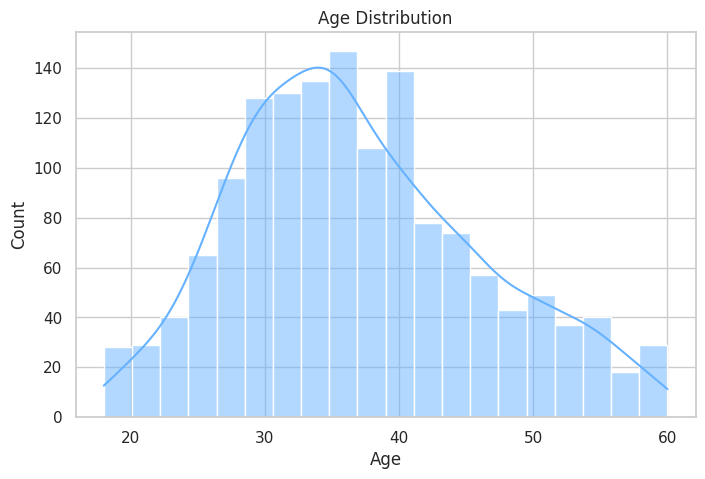

In [ ]:
# Distribution of Age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='#66B2FF')  # Light blue
plt.title("Age Distribution")
plt.show()


/tmp/ipython-input-3382426643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


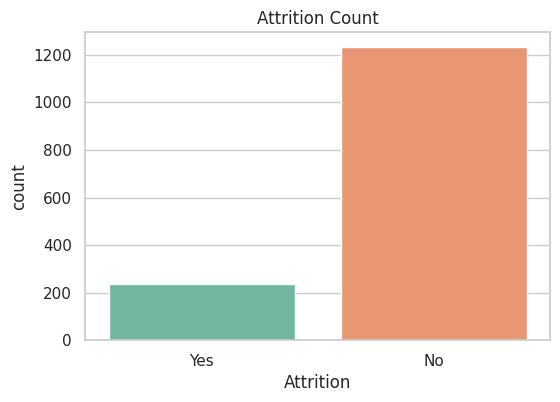

In [ ]:
# Countplot for Attrition
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title("Attrition Count")
plt.show()


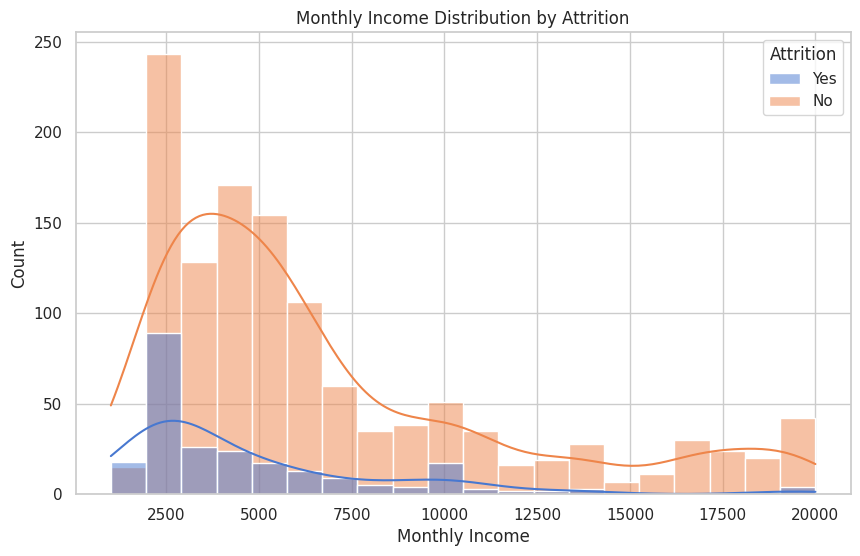

In [ ]:
# Attrition distribution by monthly Income
if 'MonthlyIncome' in df.columns:
    sns.histplot(data=df, x='MonthlyIncome', kde=True, hue='Attrition',
                 fill=True)
    plt.title('Monthly Income Distribution by Attrition')
    plt.xlabel('Monthly Income')
    plt.show()

- The distribution of age is roughly bell-shaped and unimodal, with a slight left skew. The majority of individuals are between 30 and 40 years old.

- The "No" group is significantly larger than the "Yes" group.

- While both groups have a similar income distribution shape, the plot suggests a higher concentration of attrition ("Yes" group) among individuals with lower monthly incomes.

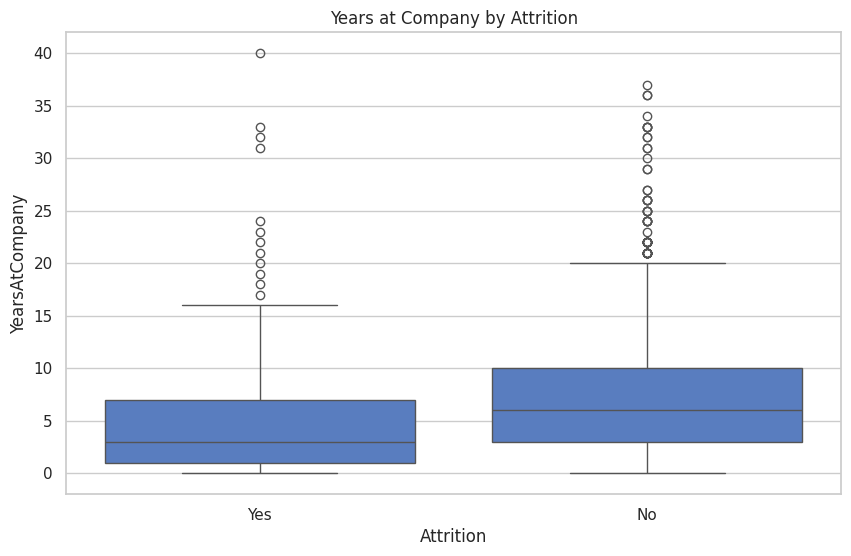

Attrition,No,Yes
count,1233.000000,237.000000
mean,7.369019,5.130802
std,6.096298,5.949984
min,0.000000,0.000000
25%,3.000000,1.000000
50%,6.000000,3.000000
75%,10.000000,7.000000
max,37.000000,40.000000


In [ ]:
# Boxplot to compare YearsAtCompany distribution by Attrition
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany')
plt.title('Years at Company by Attrition')
plt.show()

# Summary stats
df.groupby('Attrition')['YearsAtCompany'].describe().T


- The median "YearsAtCompany" for employees who attrited ("Yes" group) is 3 years, which is significantly lower than the 6 years for employees who did not attrite ("No" group)

- The middle 50% of employees who left were with the company for between 1 and 7 years, while for employees who stayed, the middle 50% were with the company for between 3 and 10 years.

-  While most employees who left had a shorter tenure, there were some outliers. The maximum years at the company for a leaver was 40 years, indicating that attrition is not exclusively limited to new employees.

### **Categorical analysis — Chi-square tests**

In [ ]:
# Function to run chi-square test and show contingency tables
def chi2_test(cat_col):
    contingency = pd.crosstab(df[cat_col], df['Attrition'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    print(f"Column: {cat_col}")
    print("Contingency table:")
    print(contingency)
    print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}\n")
    return p

# Test a few categorical columns
for col in ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'OverTime']:
    if col in df.columns:
        chi2_test(col)


Column: BusinessTravel
Contingency table:
Attrition           No  Yes
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156
Chi2 = 24.18, p-value = 0.0000

Column: Department
Contingency table:
Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92
Chi2 = 10.80, p-value = 0.0045

Column: EducationField
Contingency table:
Attrition          No  Yes
EducationField            
Human Resources    20    7
Life Sciences     517   89
Marketing         124   35
Medical           401   63
Other              71   11
Technical Degree  100   32
Chi2 = 16.02, p-value = 0.0068

Column: Gender
Contingency table:
Attrition   No  Yes
Gender             
Female     501   87
Male       732  150
Chi2 = 1.12, p-value = 0.2906

Column: MaritalStatus
Contingency table:
Attrition       No  Yes
MaritalStatus          
Divorced       294   33
Mar

The Chi-square test checks whether attrition frequency differs significantly across categories of a given variable.  
- **Low p-value (< 0.05)** → Significant association between the variable and attrition.  
- **High p-value (≥ 0.05)** → No significant association detected.

**Findings:**
- **BusinessTravel (p = 0.0000):** Significant — Employees who travel frequently have a higher attrition rate compared to those who travel rarely or not at all.
- **Department (p = 0.0045):** Significant — Attrition varies across departments, highest proportionally in Sales.
- **EducationField (p = 0.0068):** Significant — Some fields (e.g., Marketing, Technical Degree) show higher attrition rates.
- **Gender (p = 0.2906):** Not significant — Attrition does not differ meaningfully between males and females.
- **MaritalStatus (p = 0.0000):** Significant — Single employees show a notably higher attrition rate compared to married or divorced.
- **OverTime (p = 0.0000):** Significant — Employees working overtime are much more likely to leave.

**Interpretation:**  
Most tested categorical variables are significantly associated with attrition, except Gender. Overtime work, frequent travel, being single, and certain departments/fields are linked to higher attrition risk.

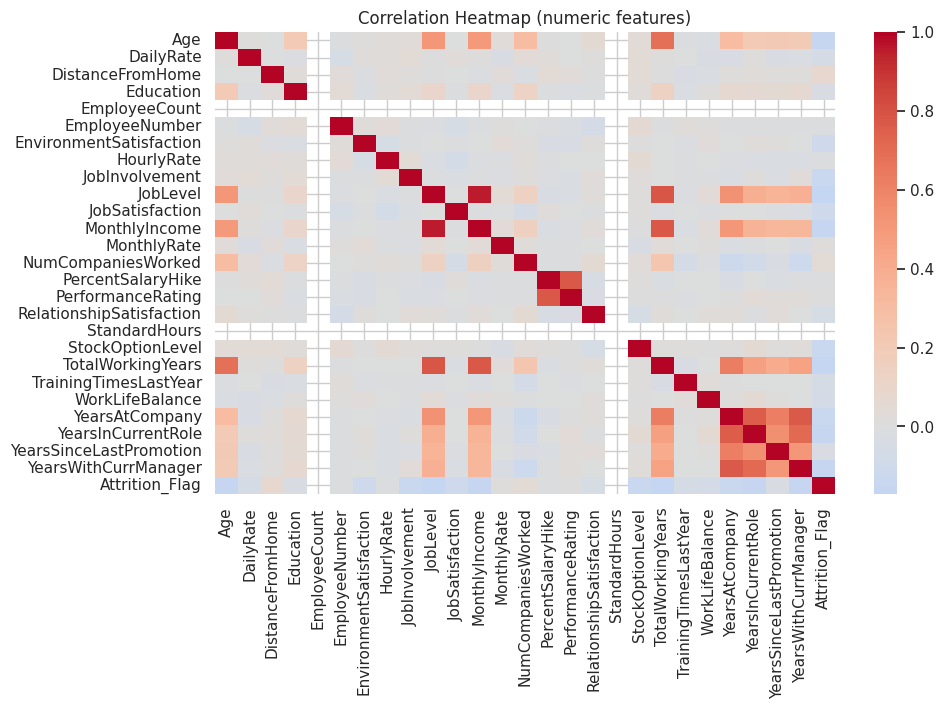

In [ ]:
# Compute correlation for numeric variables
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap (numeric features)')
plt.show()


In [ ]:
# Show top correlations with Attrition_Flag
corr_target = corr['Attrition_Flag'].sort_values(ascending=False)
corr_target


,Attrition_Flag
Attrition_Flag,1.000000
DistanceFromHome,0.077924
NumCompaniesWorked,0.043494
MonthlyRate,0.015170
PerformanceRating,0.002889
HourlyRate,-0.006846
EmployeeNumber,-0.010577
PercentSalaryHike,-0.013478
Education,-0.031373
YearsSinceLastPromotion,-0.033019


**Top Positive Correlates** (higher values linked with higher attrition probability):
1. **DistanceFromHome** (0.078) — Employees living farther away tend to leave slightly more often.
2. **NumCompaniesWorked** (0.043) — More previous employers is mildly associated with higher attrition.
3. **MonthlyRate** (0.015) — Small positive relationship, likely not practically significant.

**Top Negative Correlates** (higher values linked with lower attrition probability):
1. **TotalWorkingYears** (-0.171) — Employees with longer total work experience tend to stay.
2. **JobLevel** (-0.169) — Higher job levels are linked with lower attrition.
3. **YearsInCurrentRole** (-0.161) — Longer role tenure correlates with lower attrition.
4. **MonthlyIncome** (-0.160) — Higher salaries are associated with lower attrition.
5. **Age** (-0.159) — Older employees tend to have lower attrition rates.

**Note:** Correlation values are relatively small, indicating no single variable is a strong linear predictor of attrition. However, the direction of relationships aligns with HR expectations — stability, higher pay, and seniority tend to reduce attrition risk.


### **Feature engineering**

In [38]:
# Create age group
df['Age_Group'] = pd.cut(df['Age'], bins=[17,25,35,45,55,65], labels=['18-25','26-35','36-45','46-55','56-65'])

# Tenure bucket (YearsAtCompany)
df['Tenure_Bin'] = pd.cut(df['YearsAtCompany'], bins=[-1,1,3,5,10,40], labels=['<1','1-3','3-5','5-10','10+'])

# Combine overtime and low income
if 'OverTime' in df.columns and 'MonthlyIncome' in df.columns:
    median_income = df['MonthlyIncome'].median()
    df['LowIncome_Overtime'] = ((df['MonthlyIncome'] < median_income) & (df['OverTime'] == 'Yes')).astype(int)


# Show newly created features
df[['Age','Age_Group','YearsAtCompany','Tenure_Bin']].head()


,Age,Age_Group,YearsAtCompany,Tenure_Bin
0,41,36-45,6,5-10
1,49,46-55,10,5-10
2,37,36-45,0,<1
3,33,26-35,8,5-10
4,27,26-35,2,1-3


/tmp/ipython-input-1851242638.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_grp = df.groupby('Tenure_Bin')['Attrition_Flag'].mean().reset_index()


  Tenure_Bin  Attrition_Flag  Attrition_%
0         <1        0.348837    34.883721
1        1-3        0.184314    18.431373
2        3-5        0.130719    13.071895
3       5-10        0.122768    12.276786
4        10+        0.081301     8.130081


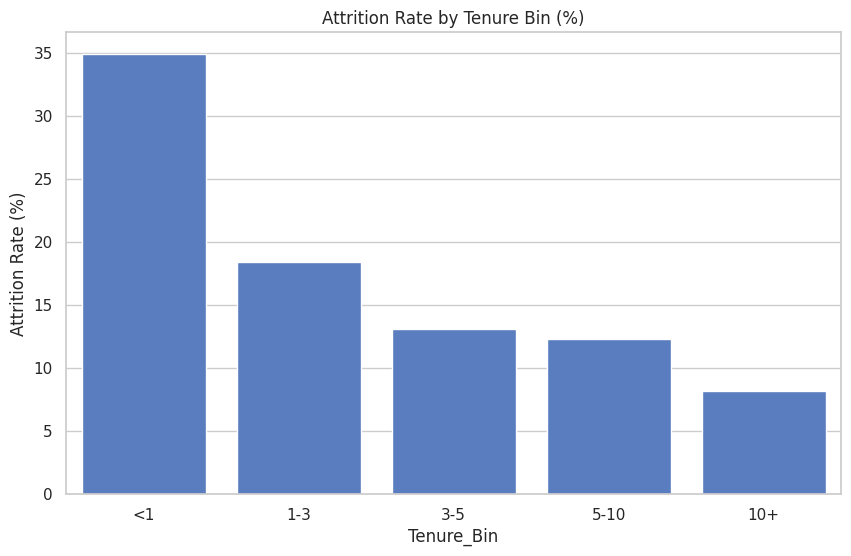

In [39]:
# Attrition rate by Tenure_Bin
if 'Tenure_Bin' in df.columns:
    tenure_grp = df.groupby('Tenure_Bin')['Attrition_Flag'].mean().reset_index()
    tenure_grp['Attrition_%'] = tenure_grp['Attrition_Flag']*100
    print(tenure_grp)
    sns.barplot(data=tenure_grp, x='Tenure_Bin', y='Attrition_%')
    plt.title('Attrition Rate by Tenure Bin (%)')
    plt.ylabel('Attrition Rate (%)')
    plt.show()


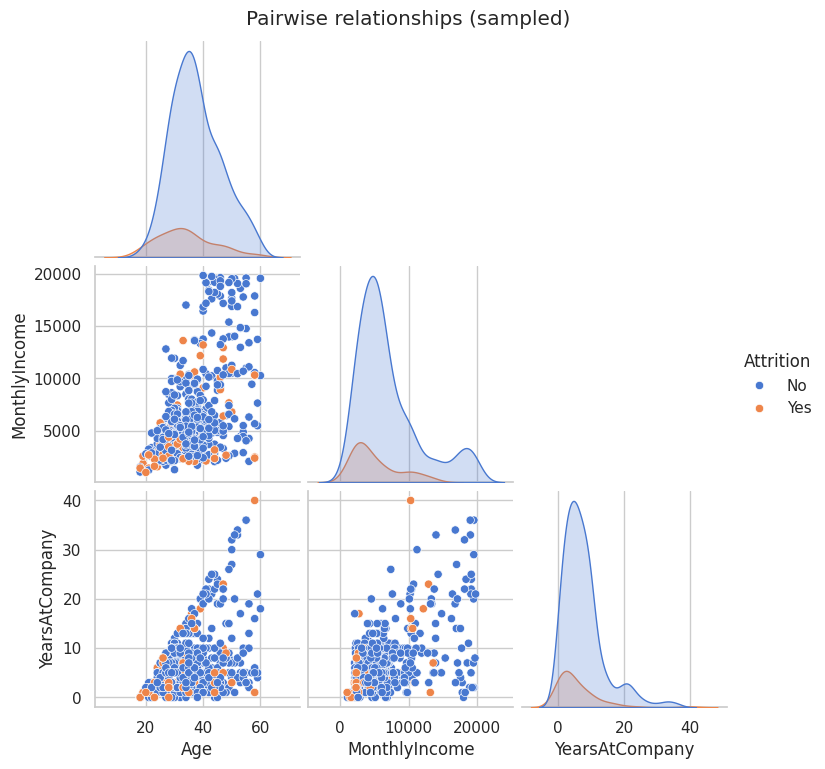

In [40]:
# Use pairplot for a few numeric columns
sample = df.sample(n=500, random_state=42)   # sample for speed
sns.pairplot(sample, vars=['Age','MonthlyIncome','YearsAtCompany'], hue='Attrition', corner=True)
plt.suptitle('Pairwise relationships (sampled)', y=1.02)
plt.show()


In [42]:
# Categorical heatmap: Attrition rate by Department and JobRole
if 'Department' in df.columns and 'JobRole' in df.columns:
    pivot = pd.crosstab(df['JobRole'], df['Department'], values=df['Attrition_Flag'], aggfunc='mean').fillna(0)
    # Show top rows
    pivot.head()


### **Statistical comparison: t-tests for numeric vars**

In [44]:
# Define groups based on Attrition_Flag (1 = leaver, 0 = stayer)
leavers = df[df['Attrition_Flag'] == 1]
stayers = df[df['Attrition_Flag'] == 0]

features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome', 'NumCompaniesWorked']

for feature in features:
    leavers_feat = leavers[feature].dropna()
    stayers_feat = stayers[feature].dropna()

    t_stat, p_val = stats.ttest_ind(leavers_feat, stayers_feat, equal_var=False)

    print(f"{feature} t-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")
    if p_val < 0.05:
        print(f"Interpretation: Significant difference in mean {feature} between leavers and stayers (p < 0.05).")
    else:
        print(f"Interpretation: No significant difference in mean {feature} between leavers and stayers (p >= 0.05).")
    print()

Age t-statistic: -5.828, p-value: 0.0000
Interpretation: Significant difference in mean Age between leavers and stayers (p < 0.05).

MonthlyIncome t-statistic: -7.483, p-value: 0.0000
Interpretation: Significant difference in mean MonthlyIncome between leavers and stayers (p < 0.05).

YearsAtCompany t-statistic: -5.283, p-value: 0.0000
Interpretation: Significant difference in mean YearsAtCompany between leavers and stayers (p < 0.05).

DistanceFromHome t-statistic: 2.888, p-value: 0.0041
Interpretation: Significant difference in mean DistanceFromHome between leavers and stayers (p < 0.05).

NumCompaniesWorked t-statistic: 1.575, p-value: 0.1163
Interpretation: No significant difference in mean NumCompaniesWorked between leavers and stayers (p >= 0.05).



### **Predictive modeling**

In [45]:
# Select features
features = [
    'Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome',
    'JobLevel', 'OverTime'
]
# Filter out features that may not exist
features = [f for f in features if f in df.columns]

# Encode categorical columns
X = df[features].copy()
y = df['Attrition_Flag']

# For 'OverTime' which may be Yes/No, convert to binary and then to numeric
if 'OverTime' in X.columns:
    X['OverTime'] = X['OverTime'].map({'Yes':1, 'No':0}).astype(int)

# Now that 'OverTime' is numerical, median can be calculated
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale numeric features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Simple baseline model — Logistic Regression**

In [46]:
# Logistic regression baseline
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')   # balanced to handle class imbalance
logreg.fit(X_train_scaled, y_train)                                     # train

# Predictions & evaluation
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.92      0.73      0.81       309
           1       0.32      0.66      0.43        59

    accuracy                           0.72       368
   macro avg       0.62      0.70      0.62       368
weighted avg       0.82      0.72      0.75       368

ROC AUC: 0.7256870166200428


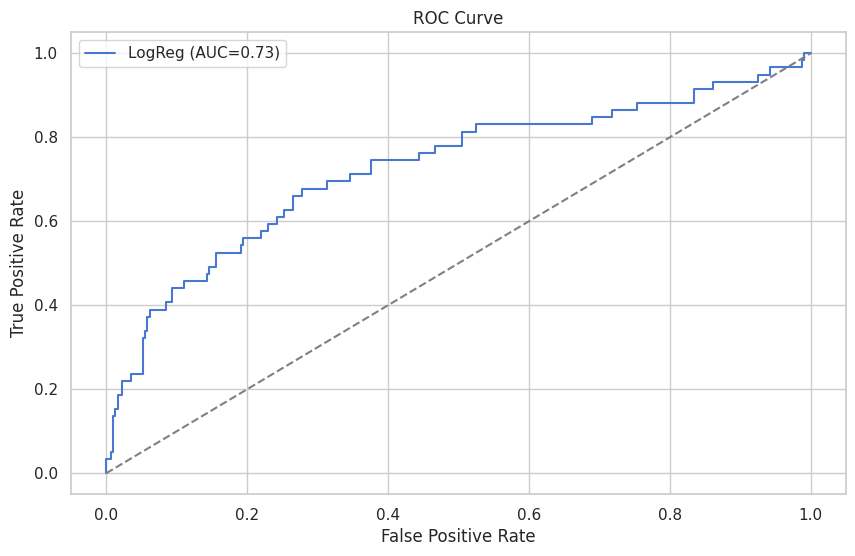

In [47]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'LogReg (AUC={roc_auc_score(y_test,y_proba):.2f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### **Stronger model — Random Forest**

In [48]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Predict + Evaluate
y_rf_pred = rf.predict(X_test)
y_rf_proba = rf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_rf_pred))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_rf_proba))


              precision    recall  f1-score   support

           0       0.86      0.95      0.91       309
           1       0.46      0.20      0.28        59

    accuracy                           0.83       368
   macro avg       0.66      0.58      0.59       368
weighted avg       0.80      0.83      0.81       368

Random Forest ROC AUC: 0.7137842137019363


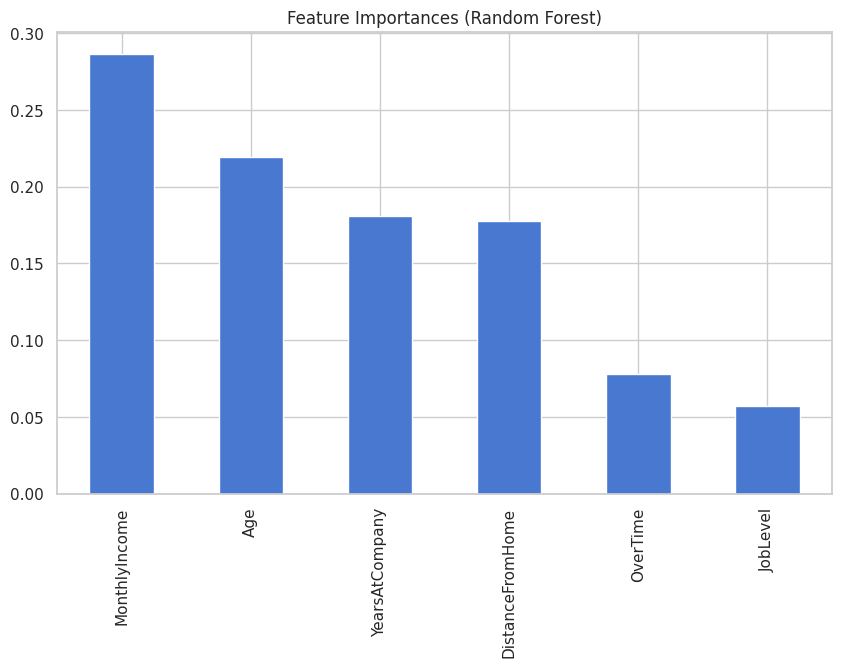

MonthlyIncome       0.286630
Age                 0.219359
YearsAtCompany      0.180824
DistanceFromHome    0.177729
OverTime            0.078030
JobLevel            0.057427
dtype: float64


In [49]:
# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='bar')
plt.title('Feature Importances (Random Forest)')
plt.show()
print(importances)


# Key Findings

- **Attrition Rate:** 16.12%
- **Demographics:** Younger employees show higher attrition rates.
- **Tenure:** Employees with shorter tenure (<1 to 3 years) leave more frequently.
- **Income:** Lower monthly income groups have higher attrition rates on average.
- **Overtime:** Employees who work overtime show elevated attrition.
- **Top predictive features (from RF):** e.g., OverTime, YearsAtCompany, MonthlyIncome, Age.
- **Statistical significance:** e.g., Age and YearsAtCompany show significant t-test differences (p < 0.05). Overtime work, frequent travel, being single, and certain departments/fields are linked to higher attrition risk.
